In [1]:
# from google.colab import drive
# drive.mount('/content/drive')


# HOME = '/content/drive/MyDrive/Pouch-Detection/release'
# print(HOME)

Mounted at /content/drive
/content/drive/MyDrive/Pouch-Detection/release


In [1]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\k_iron\Desktop\Pouch_Detection\release


In [2]:
# !mkdir {HOME}/datasets
%cd {HOME}/datasets

c:\Users\k_iron\Desktop\Pouch_Detection\release\datasets


In [ ]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="kA6lRbIJUAR2RkXm9HGe")
project = rf.workspace("mila-2ifiu").project("multi-color-pouch-detection")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.203, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Multi-color-pouch-detection-2 in yolov8:: 100%|██████████| 252/252 [00:00<00:00, 1573.97it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25  plots=True

Ultralytics YOLOv8.0.203  Python-3.11.5 torch-2.1.0+cpu CPU (13th Gen Intel Core(TM) i7-13700K)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=c:\Users\k_iron\Desktop\Pouch_Detection\release\datasets\Multi-color-pouch-detection-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, clas

In [ ]:
!yolo task=detect mode=val model={HOME}/datasets/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.203  Python-3.11.5 torch-2.1.0+cpu CPU (13th Gen Intel Core(TM) i7-13700K)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

val: Scanning C:\Users\k_iron\Desktop\Pouch_Detection\release\datasets\Multi-color-pouch-detection-2\Multi-color-pouch-detection-2\valid\labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
val: Scanning C:\Users\k_iron\Desktop\Pouch_Detection\release\datasets\Multi-color-pouch-detection-2\Multi-color-pouch-detection-2\valid\labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██

In [ ]:
!yolo task=detect mode=predict model={HOME}/datasets/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.203  Python-3.11.5 torch-2.1.0+cpu CPU (13th Gen Intel Core(TM) i7-13700K)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/5 c:\Users\k_iron\Desktop\Pouch_Detection\release\datasets\Multi-color-pouch-detection-2\test\images\0d689ceb-14d2-4445-84a1-059773584907_jpg.rf.05d18d83ecdf2b51a85c4d0fea332be0.jpg: 480x640 1 green, 1 orange, 73.0ms
image 2/5 c:\Users\k_iron\Desktop\Pouch_Detection\release\datasets\Multi-color-pouch-detection-2\test\images\4b7285a9-04e3-4eb5-ae85-901f9c1ceece_jpg.rf.a00145d78cc4c698ff57a3ee75149012.jpg: 480x640 1 green, 1 orange, 63.2ms
image 3/5 c:\Users\k_iron\Desktop\Pouch_Detection\release\datasets\Multi-color-pouch-detection-2\test\images\4d6a5c5b-37e2-4b86-aa4f-967e02e5d292_jpg.rf.3c3face3cf6f09cabb5ccef8be6087ea.jpg: 480x640 1 green, 1 orange, 60.0ms
image 4/5 c:\Users\k_iron\Desktop\Pouch_Detection\release\datasets\Multi-color-pouch-detection-2\test\images\5e5b224e-c192-449b-bbc0-774cd1f7912a_j

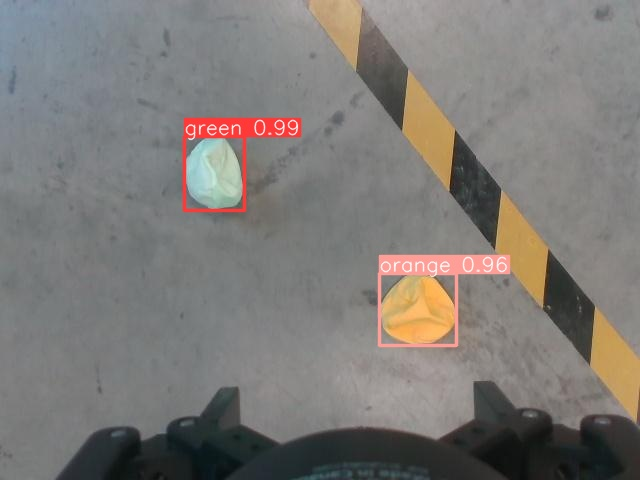

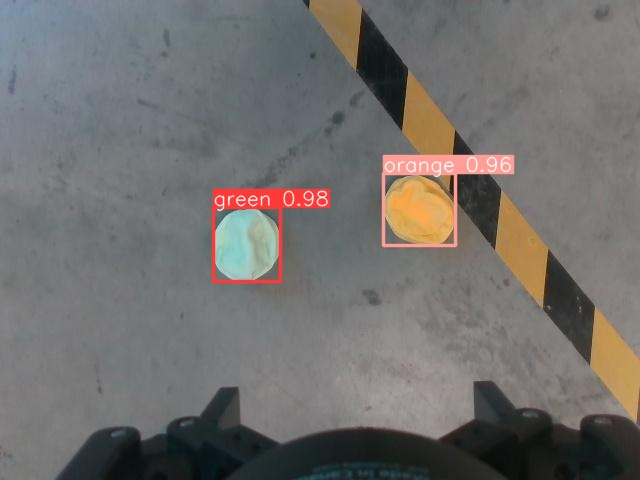

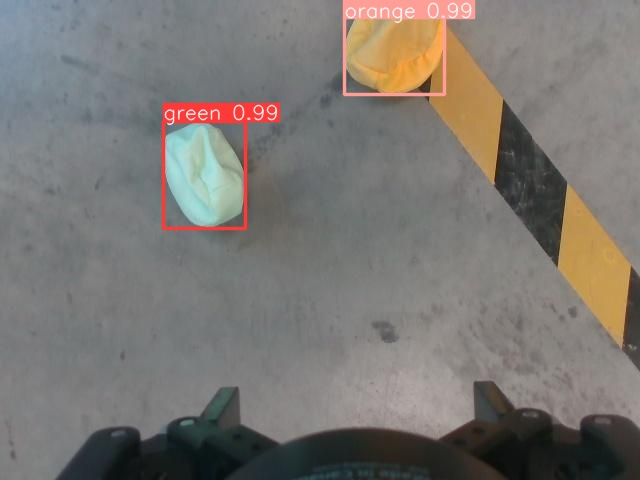

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/datasets/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [3]:

# Pip install method (recommended)

%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.203  Python-3.11.5 torch-2.1.0 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Setup complete  (24 CPUs, 63.7 GB RAM, 376.4/1862.3 GB disk)


In [5]:

from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
model = YOLO(f'{HOME}/datasets/runs/detect/train/weights/best.pt')

In [7]:
import random
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class MockupCamera:
    def __init__(self, directory):
        self.directory = directory
        self.images = glob.glob(f'{self.directory}/*.jpg')

    def capture(self):
        self.image = cv2.imread(random.choice(self.images))
        return self.image

# Test the MockupCamera class
camera = MockupCamera(f'{HOME}/data')
image = camera.capture()
# print(image.shape)
# plt.imshow(image)
# plt.show()





In [8]:
results = model.predict(source=image, conf=0.25)


0: 480x640 1 green, 1 orange, 81.5ms
Speed: 5.0ms preprocess, 81.5ms inference, 226.9ms postprocess per image at shape (1, 3, 480, 640)


In [9]:
results[0].boxes.xyxy

tensor([[174.9453, 153.0178, 250.9641, 224.6077],
        [373.2637, 126.1587, 447.3583, 201.7781]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.9922, 0.9803], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([0., 1.], device='cuda:0')

In [12]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 1.], device='cuda:0')
conf: tensor([0.9922, 0.9803], device='cuda:0')
data: tensor([[174.9453, 153.0178, 250.9641, 224.6077,   0.9922,   0.0000],
        [373.2637, 126.1587, 447.3583, 201.7781,   0.9803,   1.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (480, 640)
shape: torch.Size([2, 6])
xywh: tensor([[212.9547, 188.8127,  76.0187,  71.5899],
        [410.3110, 163.9684,  74.0947,  75.6195]], device='cuda:0')
xywhn: tensor([[0.3327, 0.3934, 0.1188, 0.1491],
        [0.6411, 0.3416, 0.1158, 0.1575]], device='cuda:0')
xyxy: tensor([[174.9453, 153.0178, 250.9641, 224.6077],
        [373.2637, 126.1587, 447.3583, 201.7781]], device='cuda:0')
xyxyn: tensor([[0.2734, 0.3188, 0.3921, 0.4679],
        [0.5832, 0.2628, 0.6990, 0.4204]], device='cuda:0')

In [13]:
mtx_path = f'{HOME}/camera/mtx.npy'
dist_path = f'{HOME}/camera/dist.npy'
camera_to_gripper_path = f'{HOME}/camera/camera_to_gripper.npy'

In [14]:
camera_intrinsics = np.load(mtx_path)
camera_distortion = np.load(dist_path)
camera_to_gripper_matrix = np.load(camera_to_gripper_path)

In [25]:
def pick_pouch(results, color):
    pouch_box = []
    if color == 'green':
        pouch_box = results[0].boxes.xyxy[results[0].boxes.cls == 0].cpu().numpy()
        pouch_box = pouch_box[0]
    elif color == 'orange':
        pouch_box = results[0].boxes.xyxy[results[0].boxes.cls == 1].cpu().numpy()
        pouch_box = pouch_box[0]
    else:
        print('Invalid color')

    return pouch_box


In [31]:
pouch_box = pick_pouch(results, 'green')
pouch_box

array([     174.95,      153.02,      250.96,      224.61], dtype=float32)

In [127]:
def estimate_3D_position(pouch_box, camera_intrinsics, camera_distortion, camera_to_gripper_matrix):

    box_center = np.array([(pouch_box[0] + pouch_box[2]) / 2, (pouch_box[1] + pouch_box[3]) / 2])
    # print(bbox_center)


    bbox_center_undistorted = cv2.undistortPoints(box_center, camera_intrinsics, camera_distortion)
    # print(bbox_center_undistorted)

    fx, fy, cx, cy = camera_intrinsics[0, 0], camera_intrinsics[1, 1], camera_intrinsics[0, 2], camera_intrinsics[1, 2]
    
    # We assume that the depth is 500mm
    depth = 500  

    # X = (bbox_center_undistorted[0][0][0] - cx) / fx * depth 
    X = bbox_center_undistorted[0][0][0] * depth
    # Y = (bbox_center_undistorted[0][0][1] - cy) / fy * depth
    Y = bbox_center_undistorted[0][0][1] * depth
    Z = depth
    camera_space_coords = np.array([X, Y, Z])
    # print(camera_space_coords)

    camera_space_coords_homogeneous = np.append(camera_space_coords, 1)

    gripper_space_coords = np.dot(camera_to_gripper_matrix, camera_space_coords_homogeneous)
    # print(gripper_space_coords)

    R_CG = camera_to_gripper_matrix[:3, :3]
    t_CG = gripper_space_coords[:3].reshape(3, 1)
    

    T_CG = np.vstack((np.hstack((R_CG, t_CG)), [0, 0, 0, 1]))

    return T_CG




In [128]:
print(estimate_3D_position(pouch_box, camera_intrinsics, camera_distortion, camera_to_gripper_matrix))

[[  0.0096695      0.9986    0.052045     -104.05]
 [   -0.99979   0.0087218    0.018405      340.99]
 [   0.017926   -0.052212     0.99848      499.66]
 [          0           0           0           1]]
